In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9hcHBlbmRpY2Vz'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_28319/674317525.py:25: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

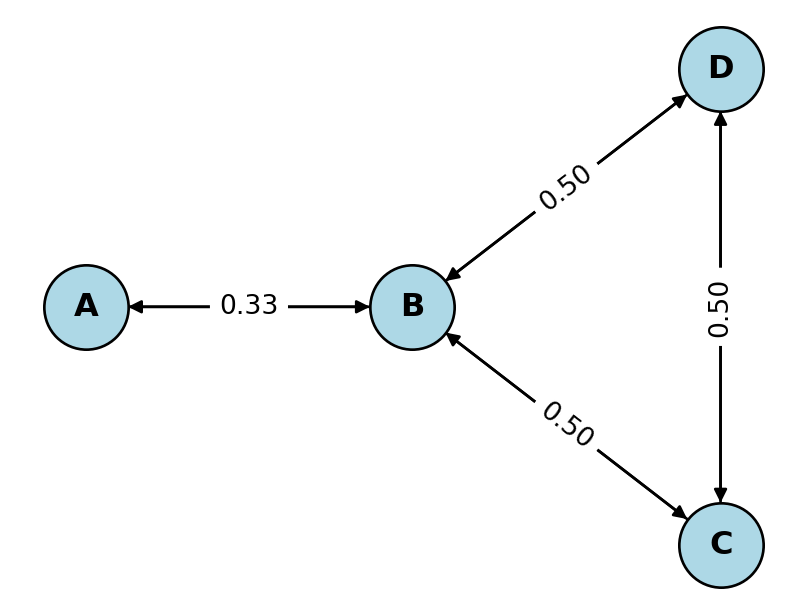

Transition matrix of the Markov chain:
[[0.   1.   0.   0.  ]
 [0.33 0.   0.33 0.33]
 [0.   0.5  0.   0.5 ]
 [0.   0.5  0.5  0.  ]]

Evolution of the Markov chain starting from state A:

        A      B      C      D
0   1.000  0.000  0.000  0.000
1   0.000  1.000  0.000  0.000
2   0.333  0.000  0.333  0.333
3   0.000  0.667  0.167  0.167
4   0.222  0.167  0.306  0.306
5   0.056  0.528  0.208  0.208
6   0.176  0.264  0.280  0.280
7   0.088  0.456  0.228  0.228
8   0.152  0.316  0.266  0.266
9   0.105  0.418  0.238  0.238
10  0.139  0.344  0.259  0.259


In [3]:
# Create a directed graph
G = nx.DiGraph()

# Add edges with transition probabilities
edges = [
    ('A', 'B', 1),
    ('B', 'C', 1/3),
    ('B', 'A', 1/3),
    ('B', 'D', 1/3),
    ('C', 'B', 1/2),
    ('C', 'D', 1/2),
    ('D', 'B', 1/2),
    ('D', 'C', 1/2)
]

G.add_weighted_edges_from(edges)

plt.figure(figsize=(4,3))
pos = nx.spectral_layout(G)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', edgecolors='black',
  labels={n: f"$\\bf{{{n}}}$" for n in G.nodes})

# Draw edge labels (weights)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.show()


# Generate the transition matrix
T = nx.to_numpy_array(G)

print("Transition matrix of the Markov chain:")
print(np.round(T, 2))

## Example: Evolution of a Markov Chain

import pandas as pd

print("\nEvolution of the Markov chain starting from state A:\n")

# Initial state distribution (start at A)
state = np.array([1, 0, 0, 0])
evolution = [state.copy()]

# Compute the distribution at each time step for 10 steps
for t in range(1, 11):
  state = state @ T
  evolution.append(state.copy())

# Create a DataFrame to display the evolution of probabilities for each state
df = pd.DataFrame(np.round(evolution, 3), columns=['A', 'B', 'C', 'D'])
# df.index.name = "Time"
print(df)

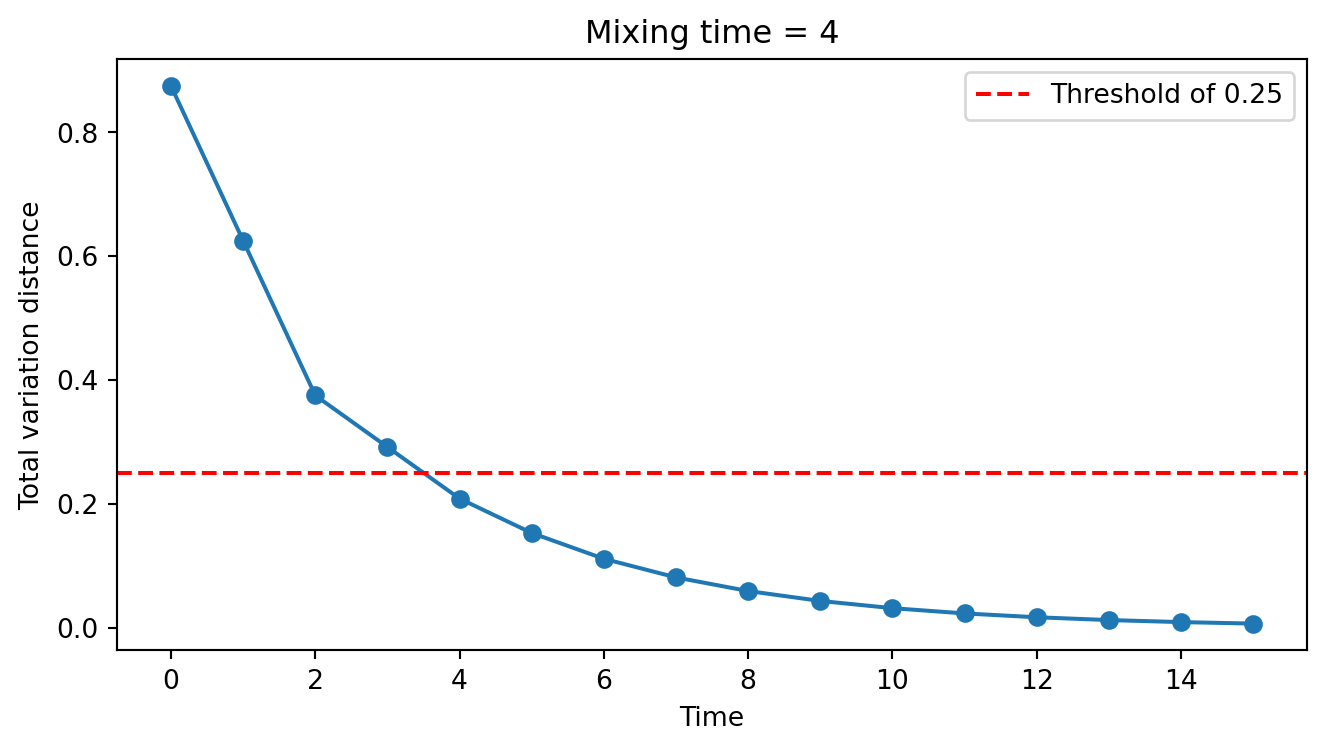

In [4]:
## Compute mixing time of the previous example 

distribution = np.array([1, 0, 0, 0])
stationary_distribution = np.array([1/8, 3/8, 2/8, 2/8])

def total_variation_distance(p, q):
    return 0.5 * np.sum(np.abs(p - q))

tvd = []
tvd.append(total_variation_distance(distribution, stationary_distribution))

for i in range(15):
    distribution = distribution @ T
    tvd.append(total_variation_distance(distribution, stationary_distribution))

mixing_time = np.argmax(np.array(tvd) < 0.25)

plt.figure(figsize=(8,4))
plt.plot(tvd, marker='o')
plt.xlabel('Time')
plt.ylabel('Total variation distance')

plt.axhline(y=0.25, color='r', linestyle='--', label='Threshold of 0.25')

plt.title(f'Mixing time = {mixing_time}')
plt.legend()
plt.show()

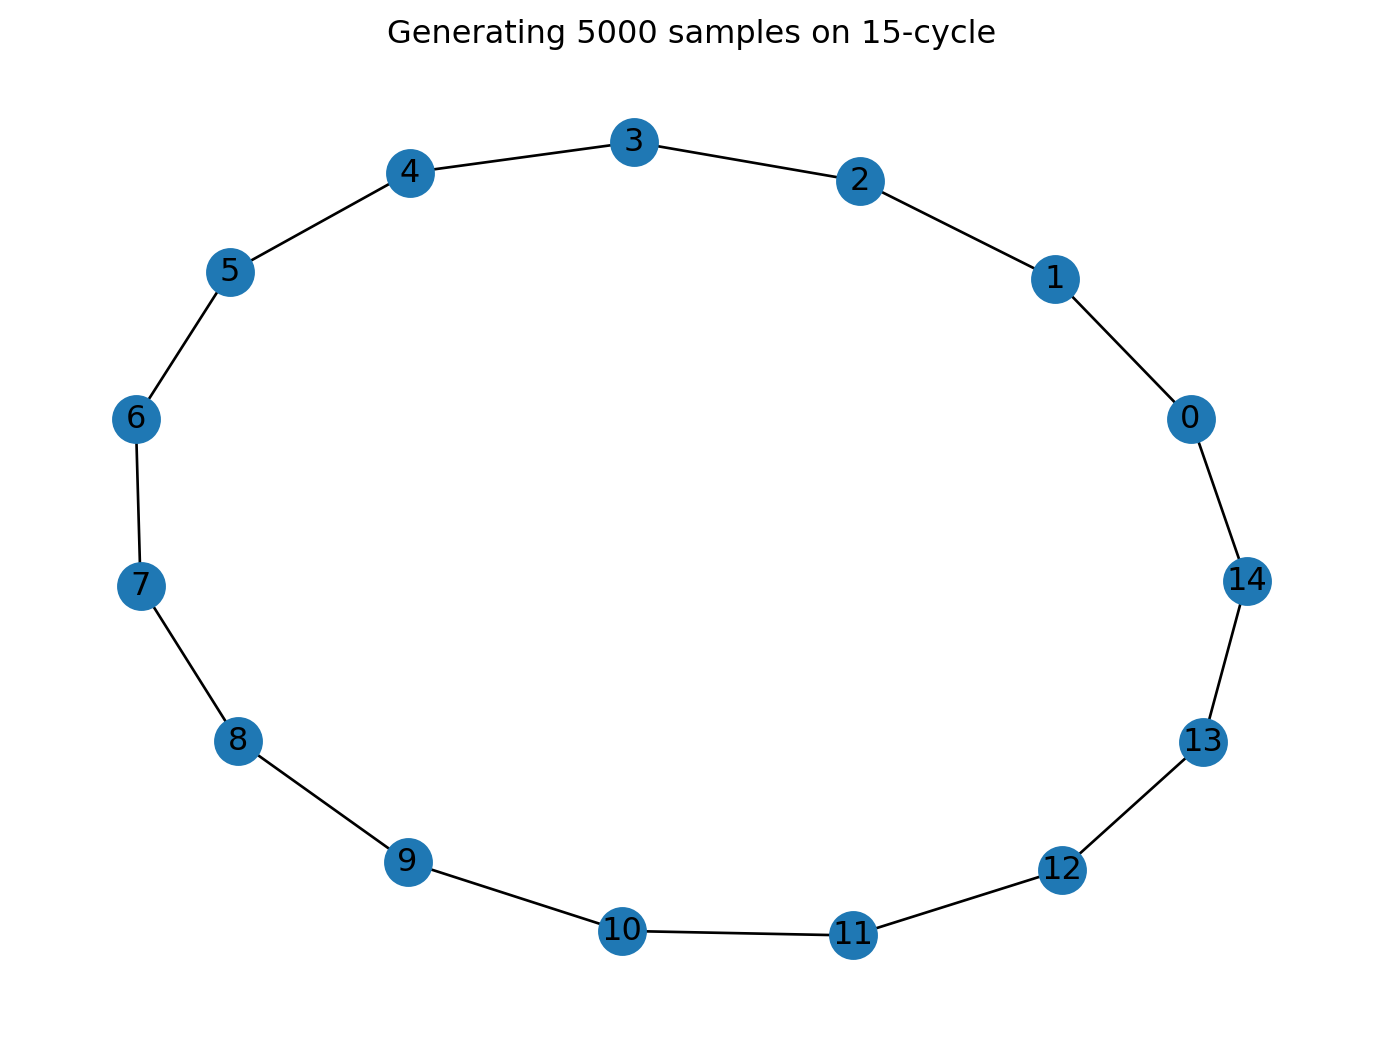

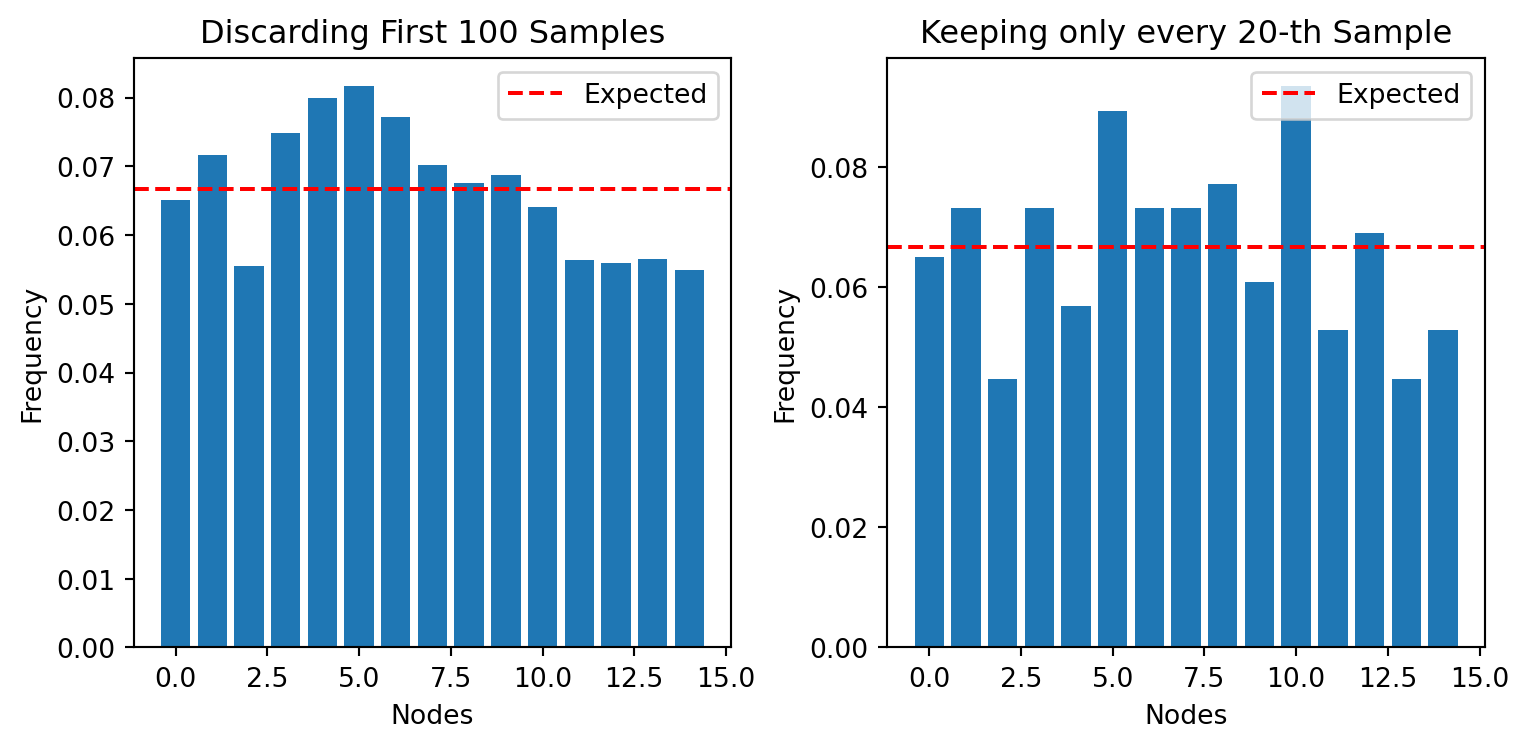

In [5]:
class GraphMC(nx.Graph):
    def __init__(self, graph):
        super().__init__()
        self.add_edges_from(graph.edges())  
        self.add_nodes_from(graph.nodes())  

    def next_node(self, current_node):
        assert current_node in self.nodes, "Current node is not in the graph."
        neighbors = list(self.neighbors(current_node))
        return neighbors[np.random.choice(len(neighbors))]  

    def random_walk(self, start_node, num_steps):
        assert start_node in self.nodes, "Start node is not in the graph."
        walk = [start_node]
        for _ in range(num_steps):
            walk.append(self.next_node(walk[-1]))
        return walk


# Create an n-cycle graph
n = 15
G = nx.cycle_graph(n)
mc = GraphMC(G)
N = 5000
T = 100

nx.draw(G, with_labels=True)
plt.title("Generating {} samples on {}-cycle".format(N, n))
plt.show()

walk = mc.random_walk(0, N)

# Remove transient phase (first 40)
walk1 = walk[T:]

# Count visits per node
node_counts1 = {node: walk1.count(node)/len(walk1) for node in mc.nodes}

k = 20

# discard first 40 samples and keep only every k-th sample
walk2 = walk[T::k]

# Count visits per node
node_counts2 = {node: walk2.count(node)/len(walk2) for node in mc.nodes}

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].bar(range(len(node_counts1)), list(node_counts1.values()))
axs[0].set_xlabel('Nodes')
axs[0].set_ylabel('Frequency')
axs[0].axhline(1/len(mc.nodes), color='r', linestyle='--', label='Expected')
axs[0].set_title('Discarding First {} Samples'.format(T))
axs[0].legend()

axs[1].bar(range(len(node_counts2)), list(node_counts2.values()))
axs[1].set_xlabel('Nodes')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Keeping only every {}-th Sample'.format(k))
axs[1].axhline(1/len(mc.nodes), color='r', linestyle='--', label='Expected')
axs[1].legend()

plt.tight_layout()
plt.show()

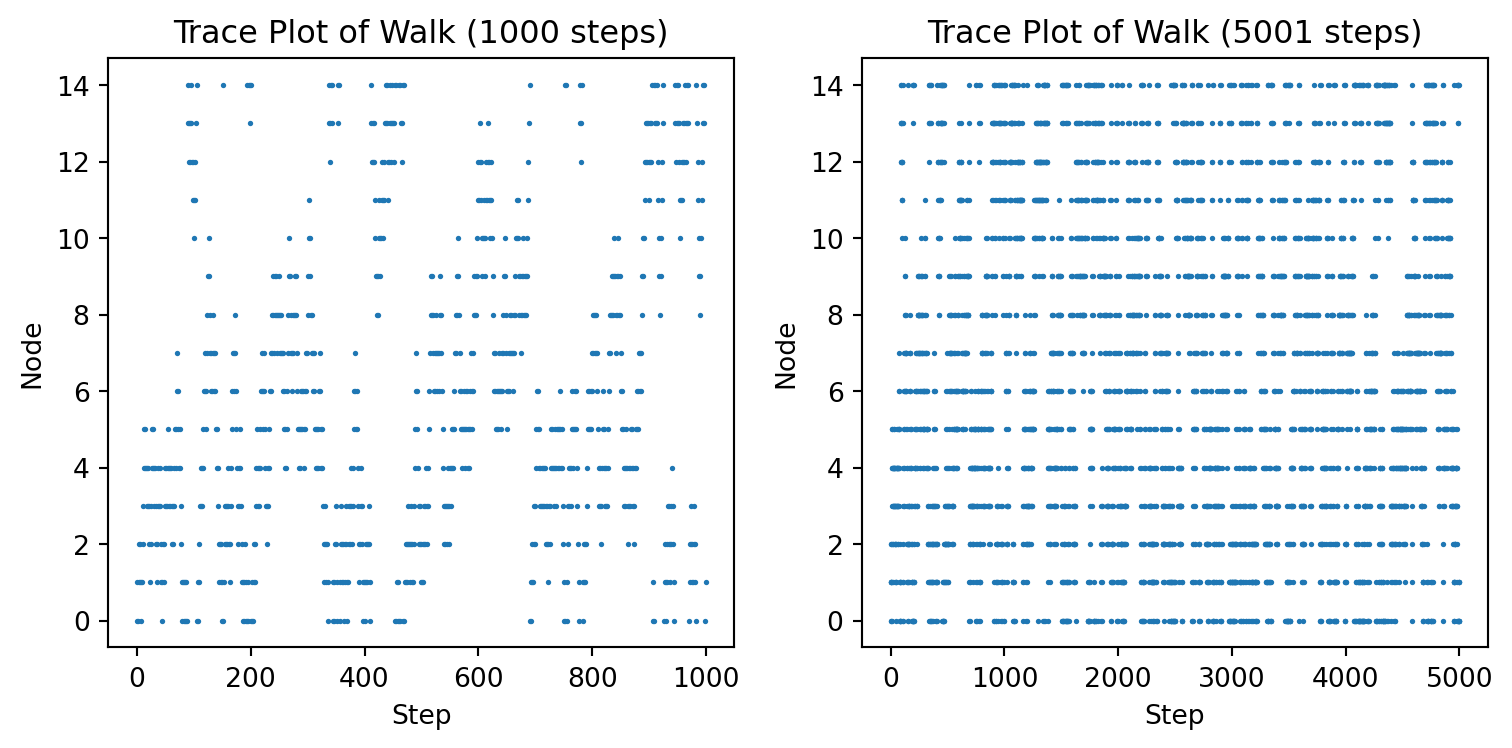

In [6]:
# trace plot of walk
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

temp = 1000
axs[0].scatter(range(temp), walk[:temp], s=1)
axs[0].set_xlabel('Step')
axs[0].set_ylabel('Node')
axs[0].set_title('Trace Plot of Walk ({} steps)'.format(temp))

temp = len(walk)
axs[1].scatter(range(temp), walk[:temp], s=1)
axs[1].set_xlabel('Step')
axs[1].set_ylabel('Node')
axs[1].set_title('Trace Plot of Walk ({} steps)'.format(temp))

plt.tight_layout()
plt.show()

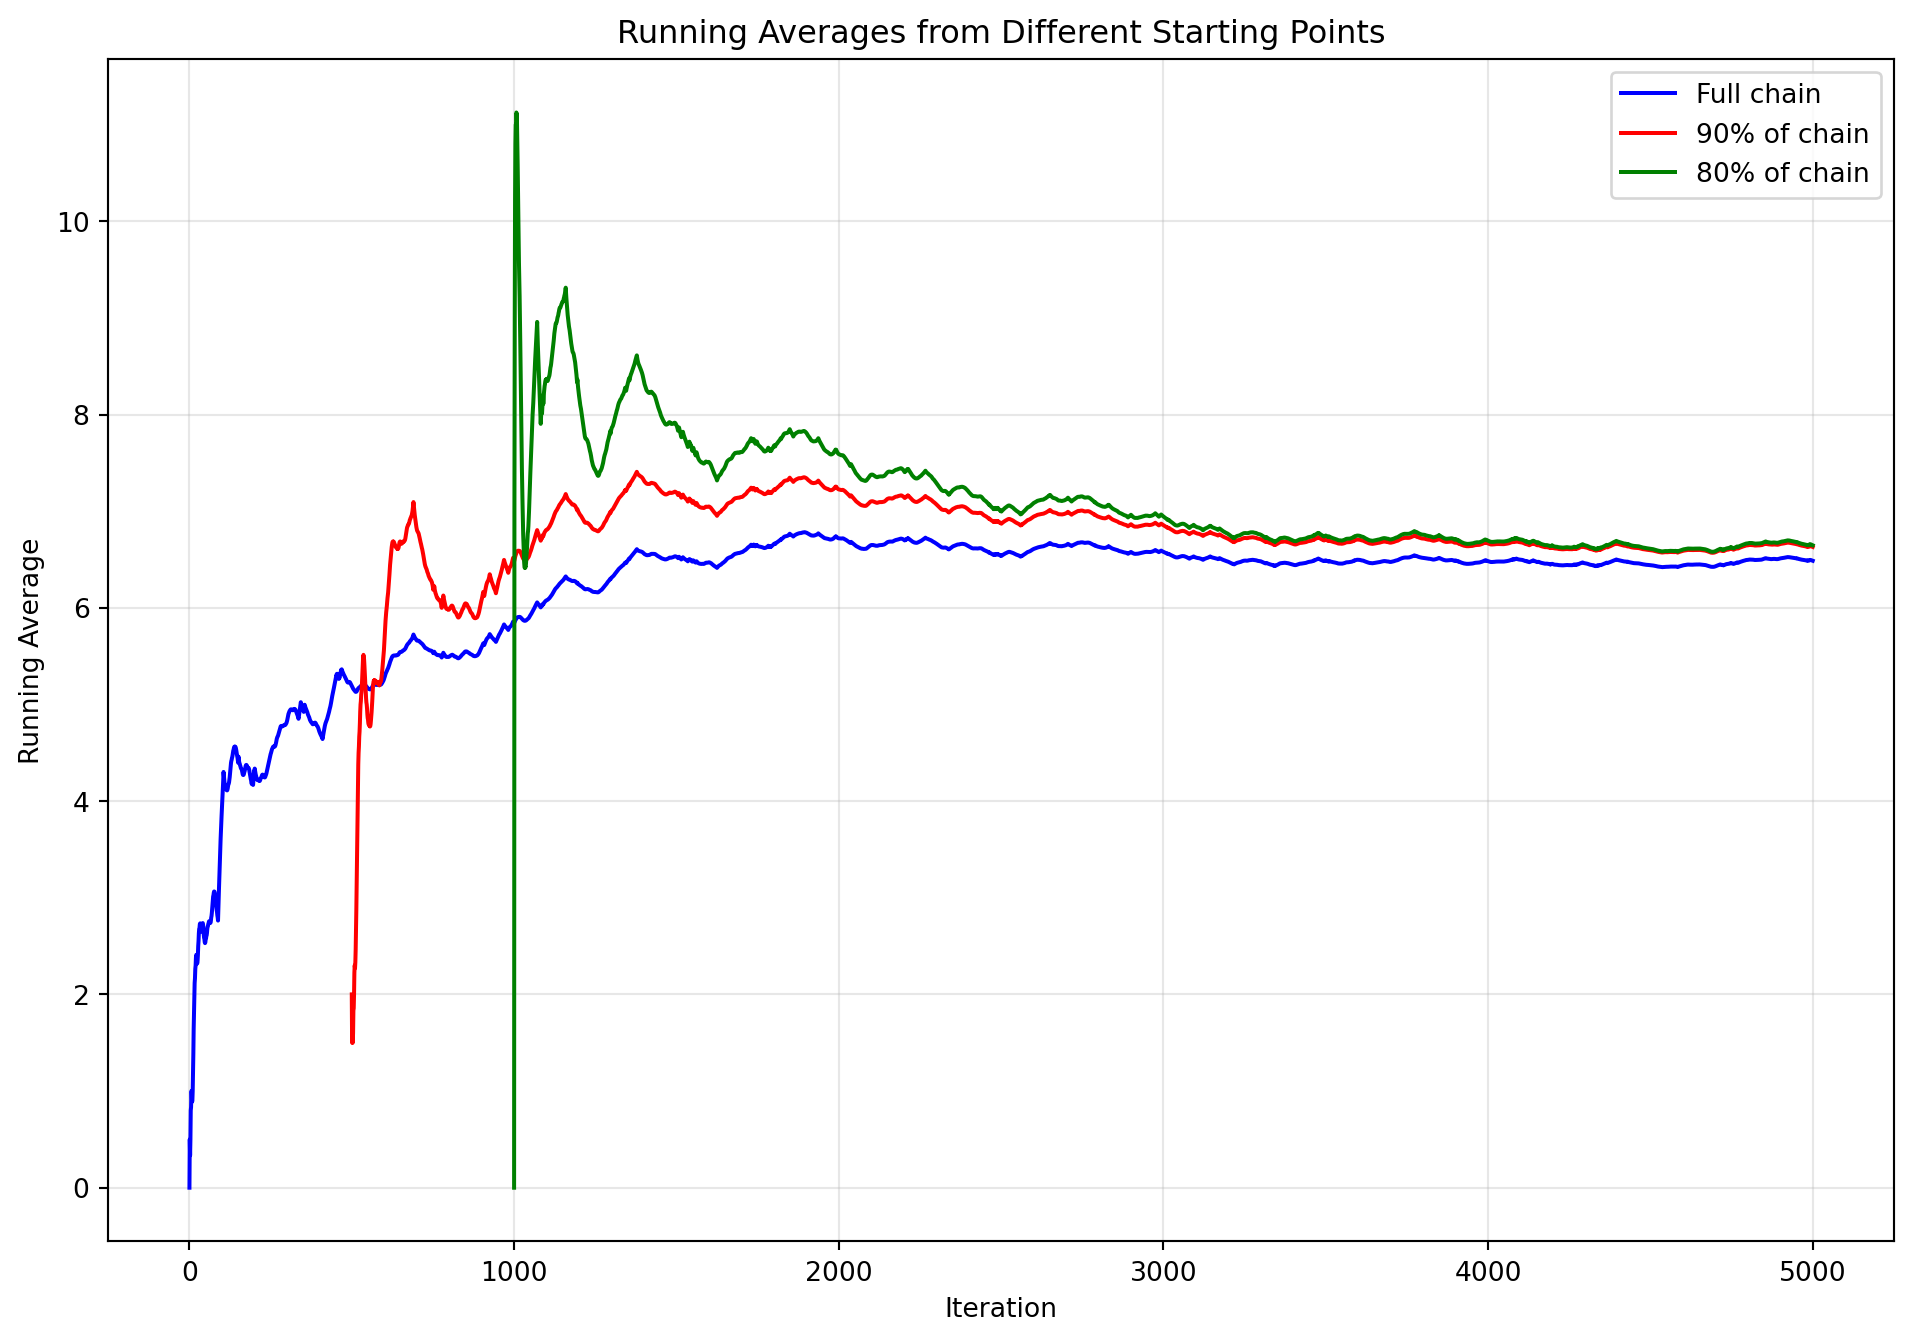

Final running average: 6.487
Average of last 25% of chain: 6.388
Difference: 0.099
Correlation with time in second half (trend test): 0.011
(Values close to 0 suggest no trend)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate running averages from different starting points
def running_average(x, start=0):
    """Calculate running average starting from index 'start'"""
    x_subset = x[start:]
    return np.cumsum(x_subset) / np.arange(1, len(x_subset) + 1)

# Different starting points for comparison
start_points = [0, len(walk)//10, len(walk)//5]
colors = ['blue', 'red', 'green']
labels = ['Full chain', '90% of chain', '80% of chain']

plt.figure(figsize=(12, 8))

# Plot 1: Running averages from different starting points
plt.title('Running Averages from Different Starting Points')
for i, start in enumerate(start_points):
    running_avg = running_average(walk, start)
    iterations = np.arange(start, start + len(running_avg))
    plt.plot(iterations, running_avg, color=colors[i], label=labels[i])

plt.xlabel('Iteration')
plt.ylabel('Running Average')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Quantitative analysis
final_avg = np.mean(walk[-len(walk)//4:])  # Average of last quarter
print(f"Final running average: {running_average(walk, 0)[-1]:.3f}")
print(f"Average of last 25% of chain: {final_avg:.3f}")
print(f"Difference: {abs(running_average(walk, 0)[-1] - final_avg):.3f}")

# Check for trend in the latter portion
latter_half = walk[len(walk)//2:]
trend_test = np.corrcoef(np.arange(len(latter_half)), latter_half)[0, 1]
print(f"Correlation with time in second half (trend test): {trend_test:.3f}")
print("(Values close to 0 suggest no trend)")

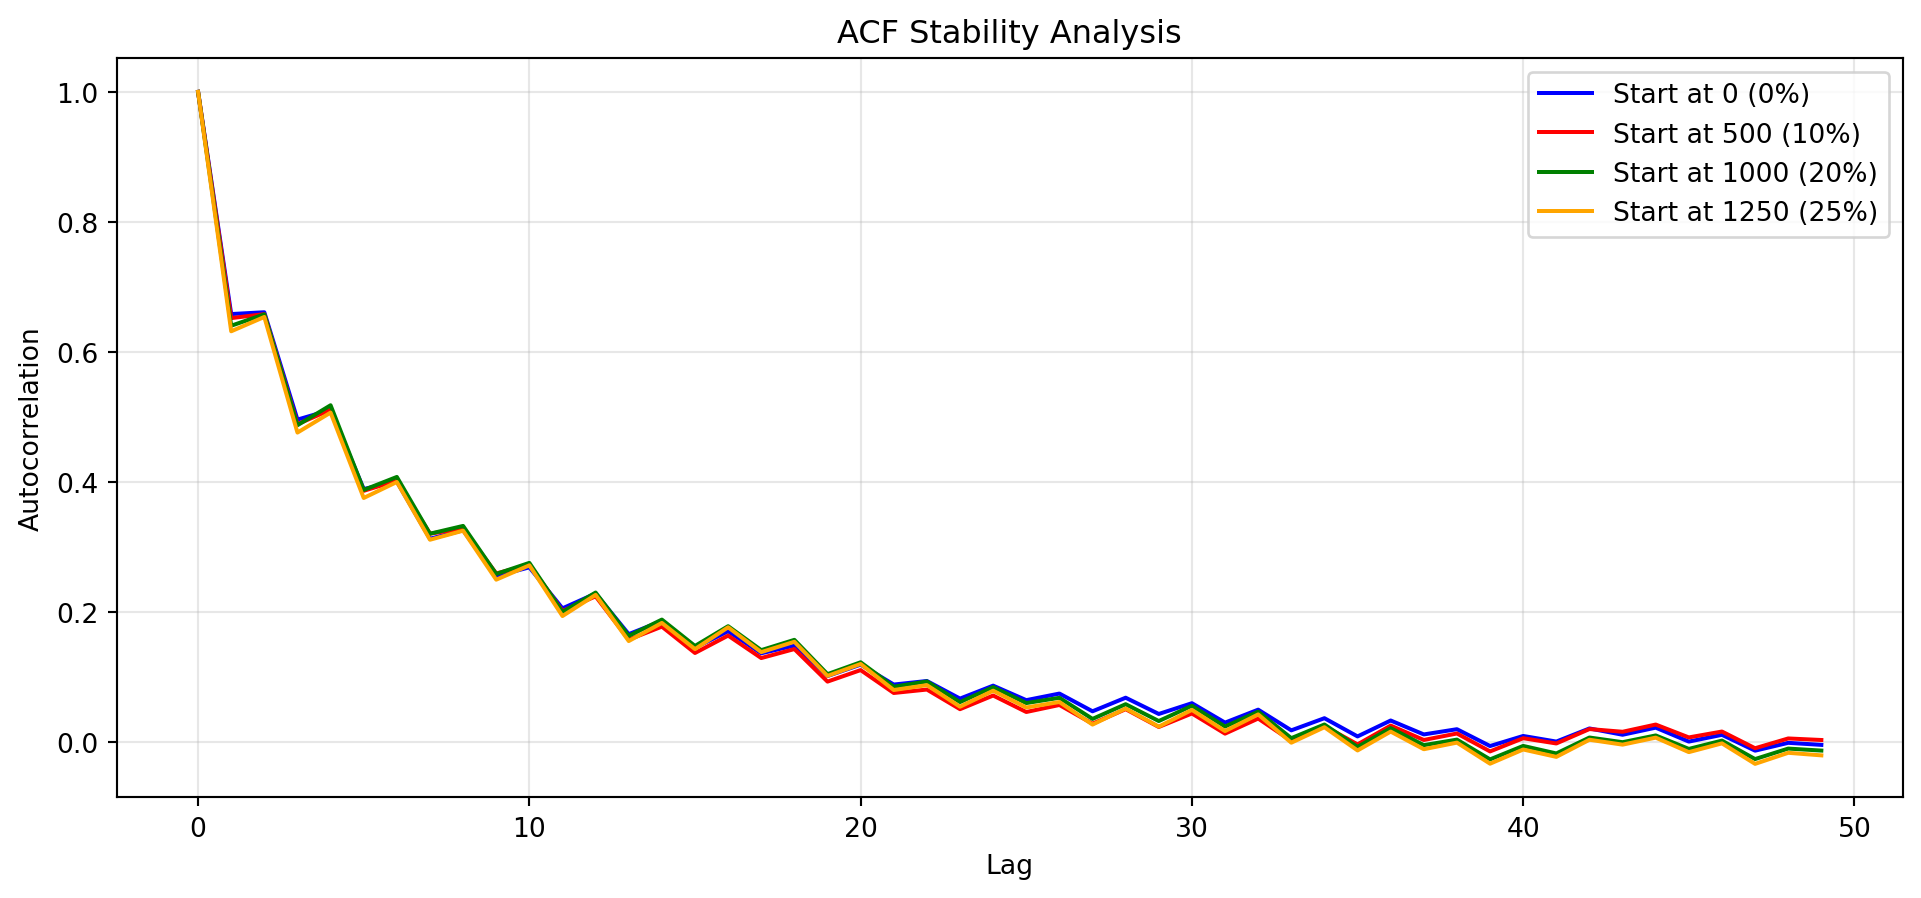

Similarity analysis:
Burn-in 0 vs 500: similarity = 0.008
Burn-in 500 vs 1000: similarity = 0.009
Burn-in 1000 vs 1250: similarity = 0.006

Based on visual inspection and similarity analysis, no burn-in is required.


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Autocorrelation analysis of walk
def autocorr(x, max_lag=50):
    """Calculate autocorrelation function up to max_lag"""
    n = len(x)
    x_centered = x - np.mean(x)
    autocorrs = []
    
    for lag in range(max_lag):
        if n - lag > lag:
            corr = np.corrcoef(x_centered[:-lag] if lag > 0 else x_centered, 
                              x_centered[lag:])[0, 1]
            autocorrs.append(corr)
        else:
            break
    return np.array(autocorrs)

# Calculate autocorrelation from different starting points
candidate_burn_ins = [0, len(walk)//10, len(walk)//5, len(walk)//4]
colors = ['blue', 'red', 'green', 'orange']

plt.figure(figsize=(12, 5))

# Autocorrelation functions from different starting points
autocorr_functions = {}
for i, burn_in in enumerate(candidate_burn_ins):
    if len(walk) - burn_in > 100:  # Ensure enough data
        post_burn_walk = walk[burn_in:]
        autocorrs = autocorr(post_burn_walk, 50)
        autocorr_functions[burn_in] = autocorrs
        plt.plot(autocorrs, color=colors[i], 
                label=f'Start at {burn_in} ({burn_in/len(walk)*100:.0f}%)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF Stability Analysis')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Check similarity between consecutive autocorrelation functions
print("Similarity analysis:")
burn_in_list = sorted(autocorr_functions.keys())
for i in range(len(burn_in_list)-1):
    current = autocorr_functions[burn_in_list[i]]
    next_one = autocorr_functions[burn_in_list[i+1]]
    min_len = min(len(current), len(next_one))
    similarity = np.mean(np.abs(current[:min_len] - next_one[:min_len]))
    print(f"Burn-in {burn_in_list[i]} vs {burn_in_list[i+1]}: similarity = {similarity:.3f}")

print(f"\nBased on visual inspection and similarity analysis, no burn-in is required.")